# Student Alcohol Consumption

## Context:

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

## Content:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
#rest of the libraries will be imported were ever necessary
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Q.2) i)
#For the given dataset “my_data.csv”, will PCA can be used to reduce the dimension ?. 
#If it is apply PCA and compute its principle components using eigen values and eigen vectors

In [4]:
df_1=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\Student Alcohol Consumption\\student-mat.csv')
df_2=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\Student Alcohol Consumption\\student-por.csv')
df_1.shape,df_2.shape

((395, 33), (649, 33))

In [5]:
df=pd.concat([df_1,df_2], axis=0)

In [6]:
df.shape#total 1044 rows and 33 features

(1044, 33)

In [7]:
df.head()#first 5 observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.tail()#last 5 observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [9]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [10]:
#checking for null values

In [11]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
#There are no null values present

In [13]:
for i in df.select_dtypes(include='object').columns:#only categorical columns
    print(df[i].value_counts())
    print()

GP    772
MS    272
Name: school, dtype: int64

F    591
M    453
Name: sex, dtype: int64

U    759
R    285
Name: address, dtype: int64

GT3    738
LE3    306
Name: famsize, dtype: int64

T    923
A    121
Name: Pstatus, dtype: int64

other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64

other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

mother    728
father    243
other      73
Name: guardian, dtype: int64

no     925
yes    119
Name: schoolsup, dtype: int64

yes    640
no     404
Name: famsup, dtype: int64

no     824
yes    220
Name: paid, dtype: int64

no     528
yes    516
Name: activities, dtype: int64

yes    835
no     209
Name: nursery, dtype: int64

yes    955
no      89
Name: higher, dtype: int64

yes    827
no     217
Name: internet, dtype: int64

no     673
yes    371


In [14]:
#Encoding

In [15]:
df1=df.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [17]:
label_encoder=LabelEncoder()
for i in df1.select_dtypes(include='object').columns:
    df1[i]=label_encoder.fit_transform(df1[i])

In [18]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
scaler=StandardScaler()
X=scaler.fit_transform(df1)
X

array([[-0.59357527, -0.87549841,  1.02788947, ..., -2.08372735,
        -1.59773801, -1.38287106],
       [-0.59357527, -0.87549841,  0.22103488, ..., -2.08372735,
        -1.90229132, -1.38287106],
       [-0.59357527, -0.87549841, -1.3926743 , ..., -1.41302861,
        -0.98863139, -0.34739149],
       ...,
       [ 1.68470629, -0.87549841,  1.02788947, ..., -0.07163114,
         0.22958185, -0.60626138],
       [ 1.68470629,  1.14220653,  0.22103488, ..., -0.40698051,
        -0.37952477, -0.34739149],
       [ 1.68470629,  1.14220653,  1.02788947, ..., -0.40698051,
        -0.07497146, -0.0885216 ]])

In [21]:
#Applying PCA for 95% of variance

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=0.95)
pca.fit(X)

PCA(n_components=0.95)

In [24]:
pca.explained_variance_ #The amount of variance explained by each of the selected components.

array([4.07710892, 2.54866127, 2.02995671, 1.69088238, 1.39504188,
       1.3754626 , 1.30725431, 1.26012413, 1.1129334 , 1.08882631,
       1.03308527, 1.00171266, 0.94461004, 0.92555574, 0.89948184,
       0.87689385, 0.85616179, 0.78986169, 0.77339684, 0.73535057,
       0.70106858, 0.68746897, 0.66249744, 0.65146072, 0.62315602,
       0.59750821, 0.53795591, 0.49705881])

In [25]:
len(pca.explained_variance_)#28 features selected

28

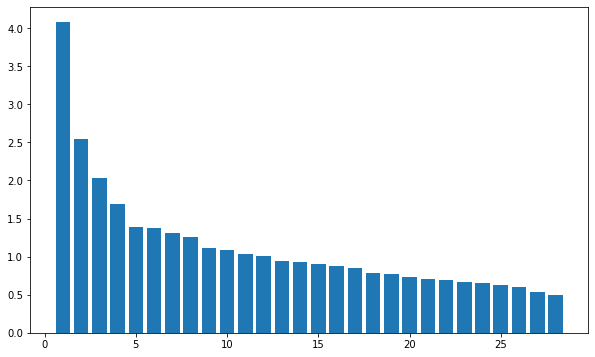

In [26]:
plt.figure(figsize=(10,6))
plt.bar(range(1,29),pca.explained_variance_)
plt.show()

In [27]:
pca.explained_variance_ratio_

array([0.12343041, 0.07715818, 0.06145492, 0.05118978, 0.0422335 ,
       0.04164076, 0.03957582, 0.038149  , 0.03369295, 0.03296313,
       0.03127563, 0.03032585, 0.02859713, 0.02802028, 0.02723092,
       0.02654709, 0.02591945, 0.02391228, 0.02341382, 0.02226201,
       0.02122415, 0.02081244, 0.02005645, 0.01972232, 0.01886543,
       0.01808897, 0.01628608, 0.01504796])

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12343041, 0.2005886 , 0.26204351, 0.31323329, 0.3554668 ,
       0.39710756, 0.43668338, 0.47483239, 0.50852534, 0.54148847,
       0.5727641 , 0.60308995, 0.63168708, 0.65970736, 0.68693827,
       0.71348536, 0.73940481, 0.76331709, 0.7867309 , 0.80899291,
       0.83021706, 0.8510295 , 0.87108595, 0.89080828, 0.90967371,
       0.92776267, 0.94404875, 0.95909671])

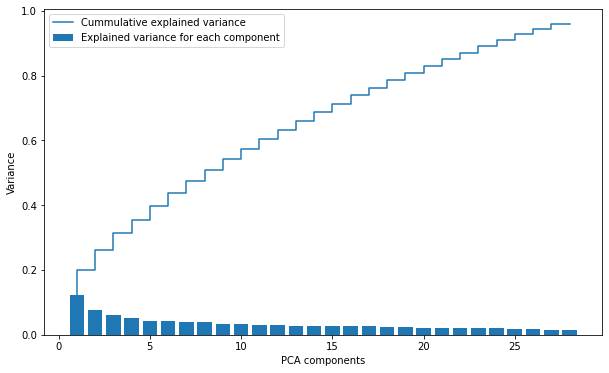

In [29]:
plt.figure(figsize=(10,6))
plt.bar(range(1,29),pca.explained_variance_ratio_,label='Explained variance for each component')
plt.step(range(1,29),np.cumsum(pca.explained_variance_ratio_),label='Cummulative explained variance')
plt.legend()
plt.ylabel('Variance')
plt.xlabel('PCA components')
plt.show()

In [30]:
#The above output shows that  28 components can be considered for >=95% of the variation in th data.

In [31]:
pca=PCA(n_components=28)
pca.fit(X)
X_pca=pca.fit_transform(X)
X_pca.shape

(1044, 28)

In [32]:
X_pca=pd.DataFrame(X_pca,columns=['PCA'+str(i) for i in range(1,29)])
X_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28
0,1.520743,-0.353898,2.704862,-0.388652,1.925142,1.014306,0.666528,1.234866,0.053169,-1.088513,...,-0.200419,-0.681650,1.095708,0.401736,0.034951,0.392714,-0.956396,-0.045319,-1.763917,-0.133789
1,2.285996,-1.581375,1.889047,-1.224891,0.114248,-1.362693,-0.920021,-1.856120,-0.419956,-0.996755,...,1.523534,-0.441944,0.285427,0.449774,-0.122199,-0.423749,0.247582,-0.743108,-0.595388,0.087674
2,2.364490,-0.381702,2.165247,0.207830,1.447159,0.036390,-2.924795,-1.200270,1.107264,1.424674,...,-1.829478,-0.670998,-1.638409,-0.025508,-1.719486,1.923642,-0.234086,-1.030599,1.149853,1.071314
3,-2.832985,-0.958354,1.421681,0.382265,-0.785137,0.365400,0.385710,-0.720680,-0.920821,0.407673,...,-0.493493,0.694043,-0.278640,-0.257783,0.962138,0.722728,0.081877,-0.086915,0.219476,0.055536
4,-0.109137,-0.446114,2.211236,-1.631927,0.708731,0.516788,-0.281567,-0.101140,-1.485353,-0.118254,...,0.156210,0.274737,-0.666525,1.274222,-0.166914,-0.414394,-0.095455,0.682961,0.204726,0.579717


In [33]:
#CLustering Methods

In [34]:
#1. K-means clustering

In [35]:
df2=X_pca.copy()

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [37]:
#Elbow Method

In [38]:
wcss=[]

for i in range(2,11):
    Kmeans=KMeans(n_clusters=i,random_state=4)
    Kmeans.fit(df2)#Compute k-means clustering.
    wcss.append(Kmeans.inertia_)#inertia_:Sum of squared distances of samples to their closest cluster center.

In [39]:
#Optimal Value of K using Elbow Plot

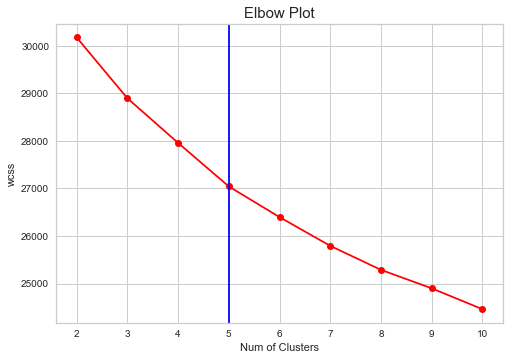

In [40]:
plt.plot(range(2,11),wcss,marker='o',color='red')
plt.title('Elbow Plot', fontsize = 15)
plt.ylabel('wcss')
plt.xlabel('Num of Clusters')
plt.axvline(x = 5, color = 'blue')
plt.show()

In [41]:
#We can see that the for K = 5, there is an elbow in the plot. 
#Before this elbow point, the WCSS is decreasing rapidly and after K = 5, the WCSS is decreasing slowly.

In [42]:
#Silhouette Method

In [43]:
for i in range(2,11):
    Kmeans=KMeans(n_clusters=i,random_state=4)
    Kmeans.fit(df2)#Compute k-means clustering.
    predictions=Kmeans.labels_  #labels_ :Labels of each point
    score=silhouette_score(df2,predictions,random_state=4)
    print('For cluster k=',i,'the Silhouette Score is',score)

For cluster k= 2 the Silhouette Score is 0.09950059410146209
For cluster k= 3 the Silhouette Score is 0.05812104373836966
For cluster k= 4 the Silhouette Score is 0.057314704586165444
For cluster k= 5 the Silhouette Score is 0.06672794402140637
For cluster k= 6 the Silhouette Score is 0.06130680683288131
For cluster k= 7 the Silhouette Score is 0.05165702503701425
For cluster k= 8 the Silhouette Score is 0.05008705498765173
For cluster k= 9 the Silhouette Score is 0.04785985694453149
For cluster k= 10 the Silhouette Score is 0.048913882038321393


In [44]:
# The above Silhouette Score for different values of K are calculated and K = 2 has the highest score as compared to others, 
#hence 2 is the optimal value depending upon the Silhouette Scorescore

In [45]:
#Optimal Value of K Using Silhouette Score

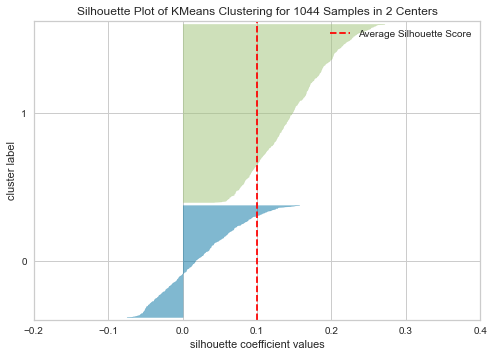

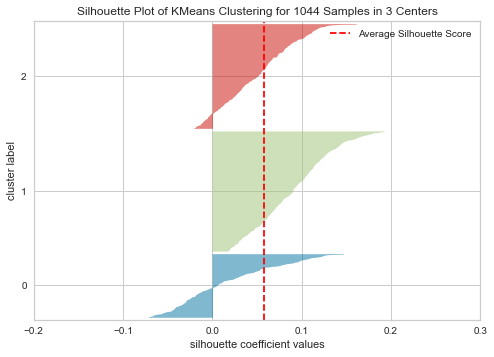

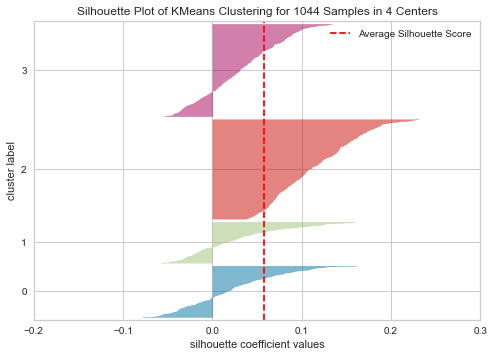

In [46]:
for i in range(2,5):
    Kmeans=KMeans(n_clusters=i,random_state=4)
    viz=SilhouetteVisualizer(Kmeans,colors='yellowbrick')
    viz.fit(df2)
    viz.show()

In [47]:
#The above plot shows the silhouette plot for each value of K =2,3,4
#from the above output, we can see that the silhouette score is maximum for k = 2 and 
#from the plot, we can see that there are are outliers for 2 clusters but less than 3 and 4 clusters
#and all the clusters have silhouette coefficients greater than the average silhouette score.
#Thus we choose K = 2 as the optimal value of k.

In [48]:
df_Kemas=df1.copy()#making copy of the original dataframe

In [49]:
df_Kemas['Cluster_Kmeans']=Kmeans.labels_

In [50]:
df_Kemas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Cluster_Kmeans
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,3
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,3
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,3
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,2
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,3


In [51]:
df_Kemas['Cluster_Kmeans'].value_counts()

2    365
3    339
0    189
1    151
Name: Cluster_Kmeans, dtype: int64

In [52]:
#2. Agglomerative clustering

In [53]:
from scipy.cluster.hierarchy import linkage,cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics.pairwise import euclidean_distances

In [54]:
method=['average','centroid','ward','weighted','median']
for i in method:
    mergings=linkage(df2,method=i,metric='euclidean')
    ed=euclidean_distances(df2)
    distance_array=ed[np.triu_indices(df2.shape[0],k=1)]
    coef,cophenet_distance=cophenet(mergings,distance_array)
    print('The cophenet coefficient is',coef,'for the method',i)

The cophenet coefficient is 0.6731477138786718 for the method average
The cophenet coefficient is 0.6263655156658461 for the method centroid
The cophenet coefficient is 0.3080088283240222 for the method ward
The cophenet coefficient is 0.5347123976701371 for the method weighted
The cophenet coefficient is 0.6067921557917944 for the method median


In [55]:
#As Coephenet Coefficient is more for average with respect to other

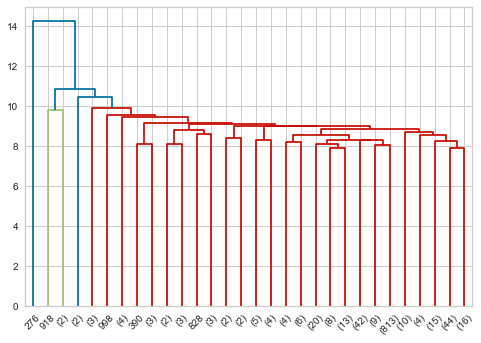

In [56]:
mergings=linkage(df2,method='average',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [57]:
#From above Dendrogram the Optimal value is considered as 2 for our Analysis.
#Hence we cut the Tree above 11 to obtain 2 clusters

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
Agglo=AgglomerativeClustering(n_clusters=2)
Agglo.fit(df2)

AgglomerativeClustering()

In [60]:
df_Agglo=df1.copy()#making copy of the original dataframe

In [61]:
df_Agglo['Cluster_Agglo']=Agglo.labels_

In [62]:
df_Agglo['Cluster_Agglo'].value_counts()

0    577
1    467
Name: Cluster_Agglo, dtype: int64

In [63]:
#3. DBSCAN(Density Based Spartial clustring of application with noise)

In [64]:
#Estimate calculation of Epsilon

In [65]:
from sklearn.neighbors import NearestNeighbors

In [66]:
Nearest_Neighbors=NearestNeighbors(n_neighbors=10)
Nearest_Neighbors.fit(df2)
distances,indices=Nearest_Neighbors.kneighbors(df2)

In [67]:
distances.shape,indices.shape

((1044, 10), (1044, 10))

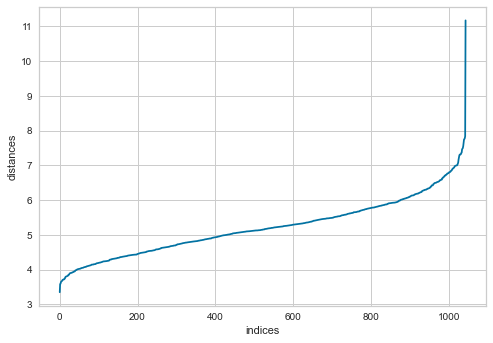

In [68]:
distances=distances[:,9]
distances=np.sort(distances,axis=0)
plt.plot(distances)
plt.xlabel('indices')
plt.ylabel('distances')
plt.show()

In [69]:
#Applying DBSCAN

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
model_DBSCAN=DBSCAN(eps=8,min_samples=2)
model_DBSCAN.fit(df2)

DBSCAN(eps=8, min_samples=2)

In [72]:
set(model_DBSCAN.labels_)

{-1, 0}

In [73]:
df_dbscan=df1.copy()#making copy of the original dataframe

In [74]:
df_dbscan['Cluster_DBSCAN']=model_DBSCAN.labels_

In [75]:
df_dbscan.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Cluster_DBSCAN
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,0


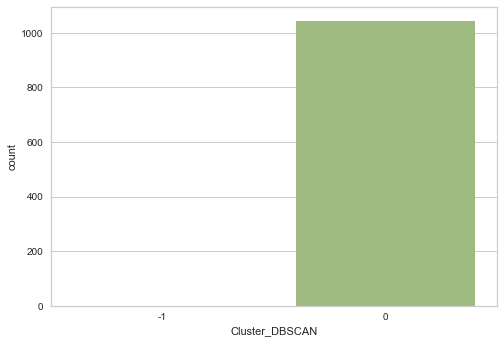

In [76]:
sns.countplot(df_dbscan['Cluster_DBSCAN'])
plt.show()

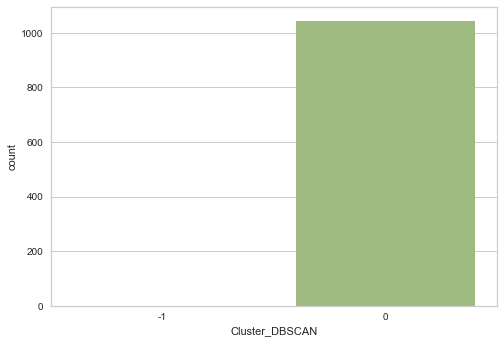

In [77]:
sns.countplot(df_dbscan['Cluster_DBSCAN'])
plt.show()

In [78]:
df_dbscan['Cluster_DBSCAN'].value_counts()

 0    1043
-1       1
Name: Cluster_DBSCAN, dtype: int64

In [79]:
#Interpretation: 

#From the above output we can see that a cluster with 1043 is the largest cluster and the only cluster
#Outlier has only 1 datapoint

In [80]:
df_dbscan[df_dbscan['Cluster_DBSCAN']==0].describe()#cluster 1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Cluster_DBSCAN
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,...,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.0
mean,0.260786,0.434324,16.724832,0.727709,0.293384,0.884947,2.603068,2.388303,2.027804,2.245446,...,3.203260,3.158198,1.494727,2.285714,3.541707,4.367210,11.214765,11.248322,11.344199,0.0
std,0.439274,0.495906,1.239941,0.445353,0.455532,0.319239,1.125379,1.100400,1.245411,0.863621,...,1.029744,1.151190,0.912023,1.285105,1.424671,5.815325,2.984588,3.285910,3.865969,0.0
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,0.0
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,0.0
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.0
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000,0.0


In [81]:
#-----------------------------------------------------END-----------------------------------------------------------------#